In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("./usa_preprocessed.csv")
#print(data.head())
print("Total num of rows in the dataset:",data.shape[0])
print()
# print("dtypes of the dataset:\n",data.dtypes)

# data = data[data.EMPSTAT != 3]
print("Number of people in laborforce:",data[data.EMPSTAT != 3].shape[0])
print()

print("Number of people who reported their income:",data[data.INCTOT != 9999999].shape[0])
print()

print("Number of people who reported their wage/salary:",data[(data.INCWAGE != 0)&(data.INCWAGE != 999999)&(data.INCWAGE != 999998)].shape[0])
print()

#print("Unique values in city:", data.CITY.unique())#listing unique values in column CITY
data = data.replace({'CITY': {0:"Unknown", 810:"Boston", 930:"Cambridge", 3770:"Lowell", 6670:"Springfield", 
                              7570:"Worcester"}})
print("Classify by City:")
print(data['CITY'].value_counts())
print()

data = data.replace({'STATEFIP': {25:"Massachusetts"}})
# print("Unique values in STATEFIP:")
# print(data['STATEFIP'].value_counts())
# print()

data = data.replace({'SEX': {1:"Male", 2:"Female"}})
print("Classify by Sex:")
print(data['SEX'].value_counts())
print()

# print("Unique values in RACE:\n", data['RACE'].value_counts())
data = data.replace({'RACE': {4:"Chinese", 5:"Japanese", 6:"Other Asian or Pacific Islander"}})
# print("Classify by Race:")
# print(data['RACE'].value_counts())
# print()

# print("Unique values in RACED:\n", data['RACED'].value_counts().sort_index(ascending=True))
data = data.replace({'RACED': {400:"Chinese",410:"Chinese", 500:"Japanese", 600:"Filipino", 610:"Indian", 620:"Korean", 
                               640:"Vietnamese",641:"Other",642:"Other",643:"Other",660:"Other",661:"Other",662:"Other",
                               663:"Thai",664:"Other",665:"Other",666:"Indonesian",667:"Other",669:"Other",670:"Other",
                               671:"Other",673:"Other",674:"Other",675:"Other",676:"Other",677:"Other",678:"Other",
                               679:"Other"}})




print("Classify by Asian Subgroups:")
print(data['RACED'].value_counts())
reported_wage = data[(data.INCWAGE != 0)&(data.INCWAGE != 999999)&(data.INCWAGE != 999998)]
reported_wage_byrace = [y for x, y in reported_wage.groupby('RACED', as_index=False)]
subgroups = [y for x, y in data.groupby('RACED', as_index=False)]
# df_chinese = ans[0]
# df_filipino = ans[1]
# df_indian = ans[2]
# df_indonesian = ans[3]
# df_japanese = ans[4]
# df_korean = ans[5]
# df_other_asians = ans[6]
# df_thai = ans[7]
# df_vietnamese = ans[7]

print()

data = data.replace({'EMPSTAT': {0:"Unknown",1:"Employed", 2:"Unemployed", 3:"Not in labor force"}})
print("Classify by Employment Status:")
print(data['EMPSTAT'].value_counts().sort_index(ascending=True))
print()


# data = data.replace({'OCC2010': {0:"Unknown",1:"Employed", 2:"Unemployed", 3:"Not in labor force"}})
# print("Classify by Occupation:")
# print(data['OCC2010'].value_counts().sort_index(ascending=True))
# print()

# data = data.replace({'EMPSTAT': {0:"Unknown",1:"Employed", 2:"Unemployed", 3:"Not in labor force"}})
# print("Classify by Industry:")
# print(data['IND'].value_counts().sort_index(ascending=True))
# print()

Total num of rows in the dataset: 23830

Number of people in laborforce: 16983

Number of people who reported their income: 20000

Number of people who reported their wage/salary: 13273

Classify by City:
Unknown        17202
Boston          3611
Lowell          1080
Cambridge       1076
Worcester        663
Springfield      198
Name: CITY, dtype: int64

Classify by Sex:
Female    12607
Male      11223
Name: SEX, dtype: int64

Classify by Asian Subgroups:
Chinese       9316
Indian        5627
Other         3265
Vietnamese    2445
Korean        1468
Filipino       800
Japanese       627
Thai           186
Indonesian      96
Name: RACED, dtype: int64

Classify by Employment Status:
Employed              12337
Not in labor force     6847
Unemployed              573
Unknown                4073
Name: EMPSTAT, dtype: int64



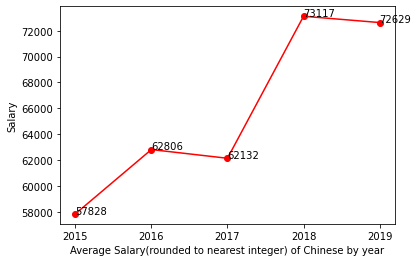

<Figure size 720x288 with 0 Axes>

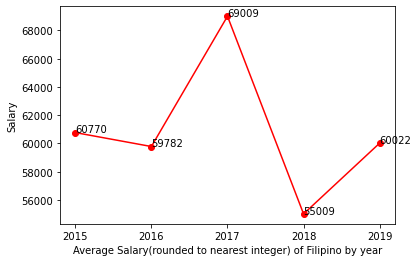

<Figure size 720x288 with 0 Axes>

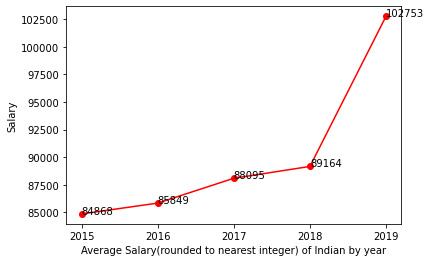

<Figure size 720x288 with 0 Axes>

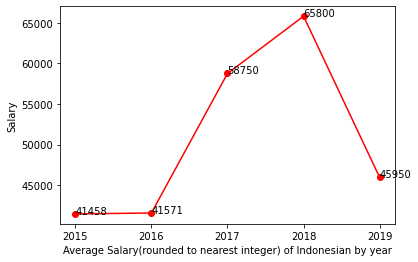

<Figure size 720x288 with 0 Axes>

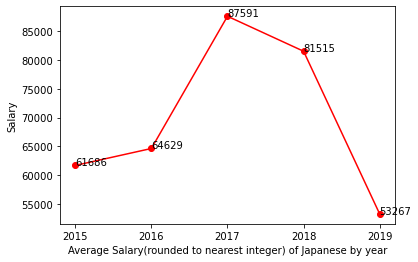

<Figure size 720x288 with 0 Axes>

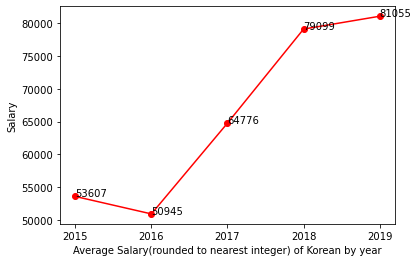

<Figure size 720x288 with 0 Axes>

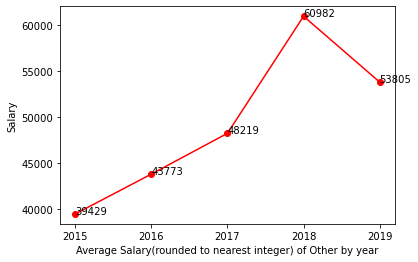

<Figure size 720x288 with 0 Axes>

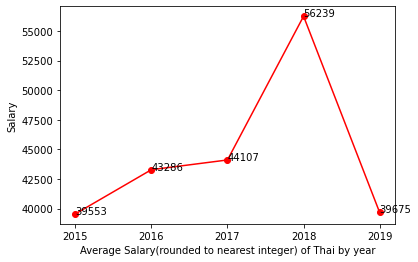

<Figure size 720x288 with 0 Axes>

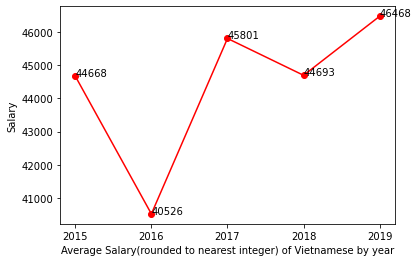

<Figure size 720x288 with 0 Axes>

In [2]:
for race in reported_wage_byrace:
    group_name = race.RACED.unique()
    mean_sal = np.array(race.groupby('YEAR')['INCWAGE'].mean())
    year = np.array(race.YEAR.unique())
    plt.plot( year, mean_sal, color = 'r',marker = 'o')
    for a,v in zip(year, mean_sal): 
        v = round(v)
        plt.text(a, v+1, str(v))
    plt.xlabel("Average Salary(rounded to nearest integer) of "+str(group_name[0])+" by year")
    plt.ylabel("Salary")
    plt.xticks(year)
    plt.figure(figsize=(10,4))
    plt.show()
#     df_2015 = race[race.YEAR == 2015]
#     df_2016 = race[race.YEAR == 2016]
#     df_2017 = race[race.YEAR == 2017]
#     df_2018 = race[race.YEAR == 2018]
#     df_2019 = race[race.YEAR == 2019]

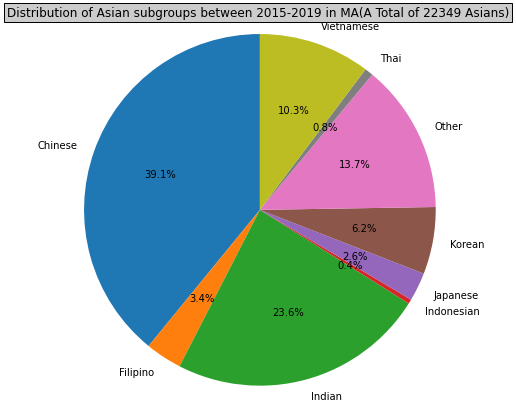

In [3]:
sizes = [len(race) for race in subgroups]
labels = [race.RACED.unique()[0] for race in subgroups]
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')
ax1.set_title("Distribution of Asian subgroups between 2015-2019 in MA(A Total of 22349 Asians)",
             bbox={'facecolor':'0.8','pad':3})
plt.show()

[2503, 2378, 2568, 2783, 3041]
[2015, 2016, 2017, 2018, 2019]
There are total of 2503 labor force in Asians in 2015


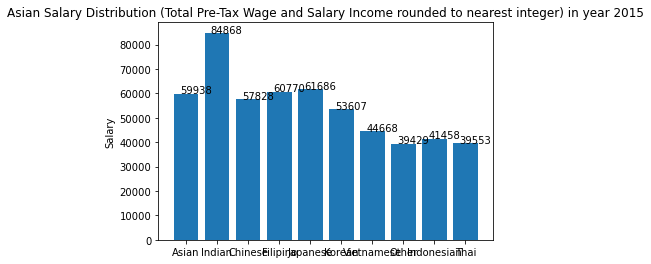

There are total of 2378 labor force in Asians in 2016


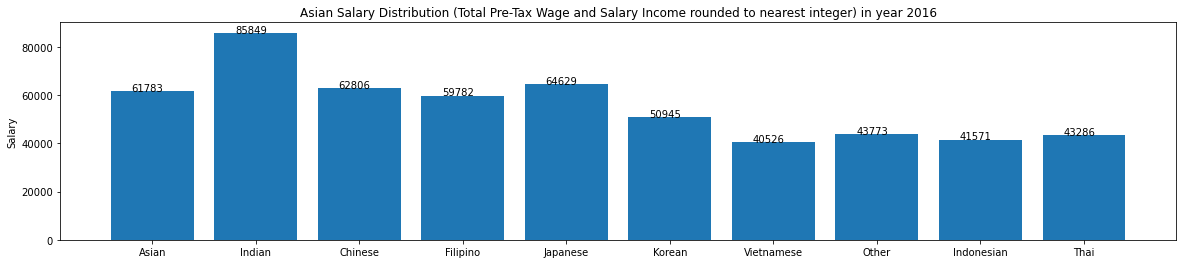

There are total of 2568 labor force in Asians in 2017


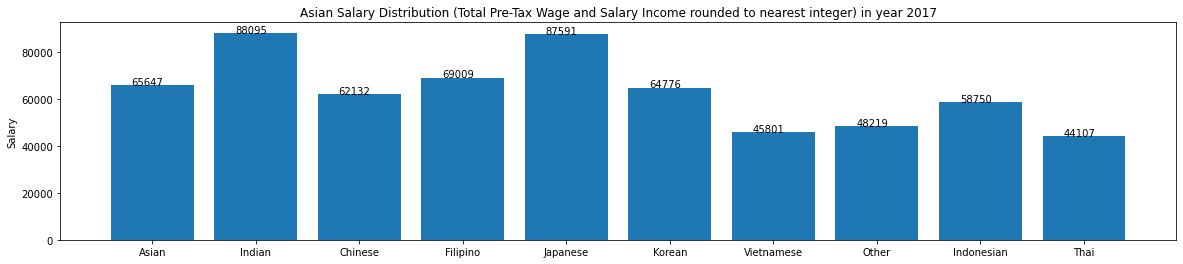

There are total of 2783 labor force in Asians in 2018


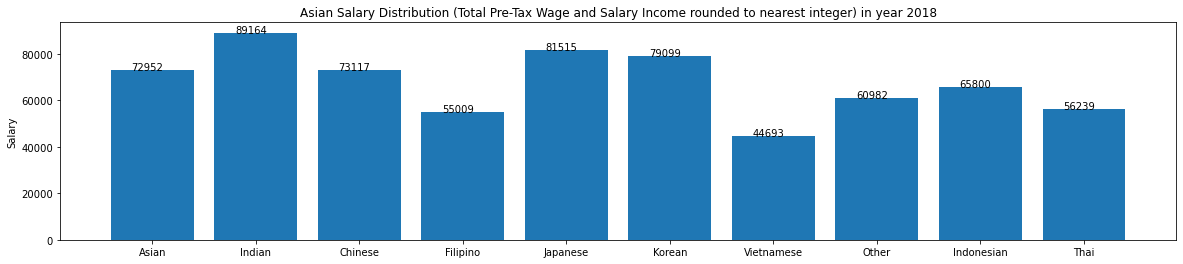

There are total of 3041 labor force in Asians in 2019


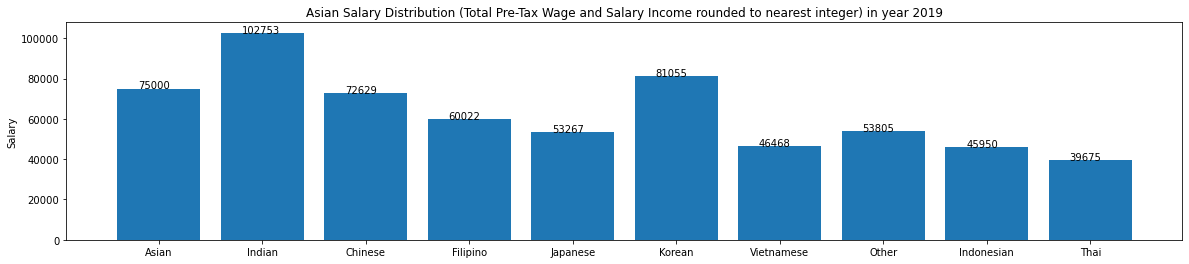

In [4]:
reported_wage_byyear = [y for x, y in reported_wage.groupby('YEAR', as_index=False)]
size_year = [len(year) for year in reported_wage_byyear]
labels = [year.YEAR.unique()[0] for year in reported_wage_byyear]
print(size_year)
print(labels)
for sub_data in reported_wage_byyear:
    current_year = sub_data.YEAR.unique()[0]
    laborforce = sub_data[(sub_data.INCWAGE!=0)]
    Chinese = sub_data[sub_data.RACED == 'Chinese']
    Filipino = sub_data[sub_data.RACED == 'Filipino']
    Indian = sub_data[sub_data.RACED == 'Indian']
    Indonesian = sub_data[sub_data.RACED == 'Indonesian']
    Japanese = sub_data[sub_data.RACED == 'Japanese']
    Korean = sub_data[sub_data.RACED == 'Korean']
    Other = sub_data[sub_data.RACED == 'Other']
    Thai = sub_data[sub_data.RACED == 'Thai']
    Vietnamese = sub_data[sub_data.RACED == 'Vietnamese']
    

    print("There are total of",str(len(laborforce)), "labor force in Asians in "+str(current_year))

    income=[laborforce['INCWAGE'].mean(),Indian['INCWAGE'].mean(),Chinese['INCWAGE'].mean(),Filipino['INCWAGE'].mean(),
            Japanese['INCWAGE'].mean(),Korean['INCWAGE'].mean(),Vietnamese['INCWAGE'].mean(),Other['INCWAGE'].mean(),
            Indonesian['INCWAGE'].mean(),Thai['INCWAGE'].mean()]
    labels=['Asian','Indian','Chinese','Filipino','Japanese','Korean','Vietnamese','Other','Indonesian','Thai']
    y_pos = np.arange(len(labels))
    params = {'figure.figsize': '20, 4'}
    for i, v in enumerate(income):
        v = round(v)
        plt.text(y_pos[i] - 0.2, v + 1.05, str(v))
    plt.rcParams.update(params)
    plt.bar(y_pos, income, align='center', alpha=1)
    plt.xticks(y_pos, labels)
    plt.ylabel('Salary')
    plt.title('Asian Salary Distribution (Total Pre-Tax Wage and Salary Income rounded to nearest integer) in year '+str(current_year))
    plt.show()



In [5]:
laborforce = pd.read_csv("./ipums_usa.csv")
laborforce=laborforce[laborforce.OCC2010!=9920]
print('There are totally 15955 laborforce')
occ=laborforce['OCC2010'].value_counts()
occ=occ.to_frame()
occ.columns=['counts']
occ=occ[occ.counts>100]
count=occ['counts'].tolist()
occ_list=['Software Developers, Applications and Systems Software','Postsecondary Teachers','Other Business Operations Specialists(Managers)',
          'Computer Scientists and Systems Analysts/Network systems Analysts/Web Developers','Cashiers','Chefs and Cooks',
          'Physical Scientists','Physicians and Surgeons','Medical Scientists, and Life Scientists','Accountants and Auditors',
          'Retail Salespersons','Registered Nurses','First-Line Supervisors of Sales Workers','Personal Appearance Workers',
          'Waiters and Waitresses','Engineers','Other Teachers and Instructors','Management Analysts','Assemblers and Fabricators',
          'Customer Service Representatives','Office Clerks','Elementary and Middle School Teachers','Financial Managers',
          'Other Financial Specialists','Secretaries and Administrative Assistants','Life, Physical, and Social Science Technicians',
          'Computer and Information Systems Managers','Teacher Assistants','Food Preparation Workers','Food Service and Lodging Managers',
          'Computer Programmers','Chief executives and legislators/public administration',
          'Inspectors, Testers, Sorters, Samplers, and Weighers']
occ=pd.DataFrame(count,occ_list)
occ.columns=['counts']
print(occ)

There are totally 15955 laborforce
                                                    counts
Software Developers, Applications and Systems S...     885
Postsecondary Teachers                                 579
Other Business Operations Specialists(Managers)        507
Computer Scientists and Systems Analysts/Networ...     386
Cashiers                                               381
Chefs and Cooks                                        349
Physical Scientists                                    347
Physicians and Surgeons                                346
Medical Scientists, and Life Scientists                284
Accountants and Auditors                               283
Retail Salespersons                                    236
Registered Nurses                                      218
First-Line Supervisors of Sales Workers                217
Personal Appearance Workers                            208
Waiters and Waitresses                                 204
Engineers            

There are 4347 people work as top 10 occupations, about 0.272453776245691 of the total laborforce


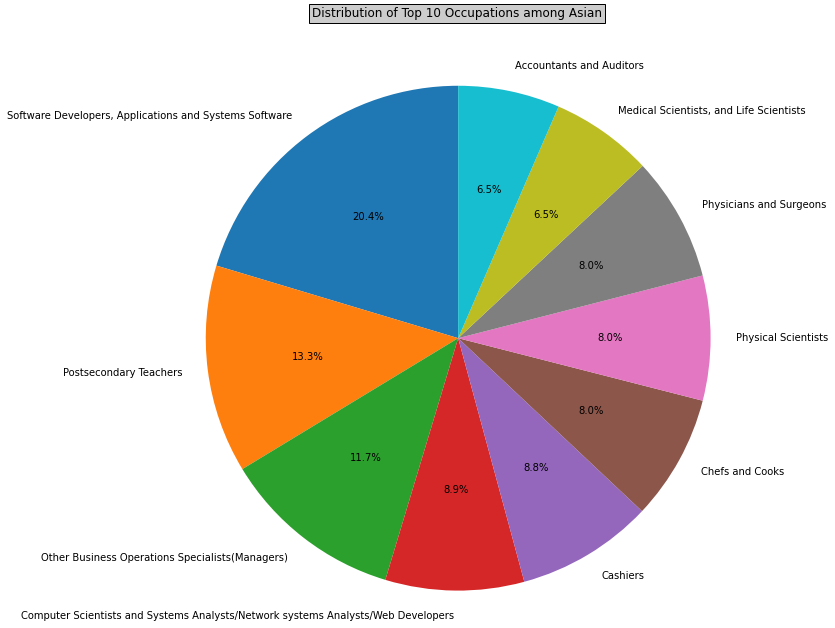

In [6]:
sum_top=sum(count[:10])
print('There are',str(sum_top),'people work as top 10 occupations, about',str(sum_top/15955),'of the total laborforce')
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(count[:10],labels=occ_list[:10], autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')     
figure_title="Distribution of Top 10 Occupations among Asian"
plt.title(figure_title, y=1.08,bbox={'facecolor':'0.8','pad':3})
plt.show()

In [7]:
laborforce = laborforce.replace({'RACED': {400:"Chinese",410:"Chinese", 500:"Japanese", 600:"Filipino", 610:"Indian", 620:"Korean", 
                               640:"Vietnamese",641:"Other",642:"Other",643:"Other",660:"Other",661:"Other",662:"Other",
                               663:"Thai",664:"Other",665:"Other",666:"Indonesian",667:"Other",669:"Other",670:"Other",
                               671:"Other",673:"Other",674:"Other",675:"Other",676:"Other",677:"Other",678:"Other",
                               679:"Other"}})
laborce=laborforce.replace({'OCC2010':{1020:'Software Developers, Applications and Systems Software',2200:'Postsecondary Teachers',
                                       4000:'Chefs and Cooks',1760:'Physical Scientists',430:'Business Operations Specialists(Managers)',
                                       1650:'Medical Scientists, and Life Scientists',4720:'Cashiers',800:'Accountants and Auditors',
                                       1000:'Computer Scientists and Systems Analysts/Network systems Analysts/Web Developers',
                                       3060:'Physicians and Surgeons'
    
}
    
}

)
Chinese = laborforce[laborforce.RACED == 'Chinese']
Filipino = laborforce[laborforce.RACED == 'Filipino']
Indian = laborforce[laborforce.RACED == 'Indian']
Indonesian = laborforce[laborforce.RACED == 'Indonesian']
Japanese = laborforce[laborforce.RACED == 'Japanese']
Korean = laborforce[laborforce.RACED == 'Korean']
Other = laborforce[laborforce.RACED == 'Other']
Thai = laborforce[laborforce.RACED == 'Thai']
Vietnamese = laborforce[laborforce.RACED == 'Vietnamese']

There are 1843 people work as top 10 occupations, about 0.32840342124019956 of the total Chinese Laborforce


Text(0.5, 1.08, 'Distribution of Top 10 Occupations among Chinese')

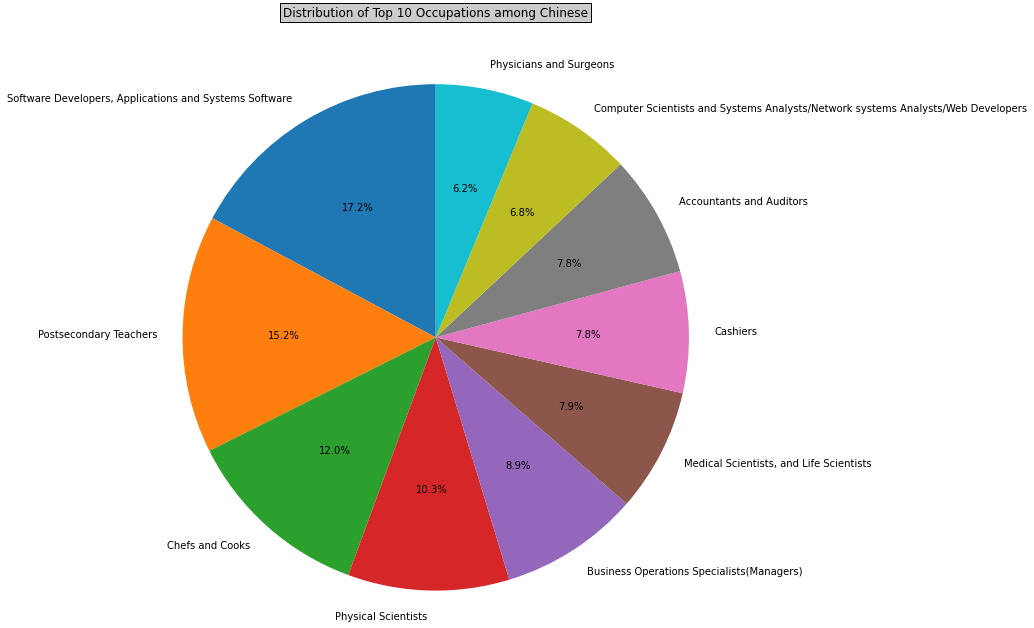

In [8]:
occ=Chinese['OCC2010'].value_counts()
count=occ.tolist()[:10]
occ_list=['Software Developers, Applications and Systems Software','Postsecondary Teachers',
           'Chefs and Cooks','Physical Scientists','Business Operations Specialists(Managers)',
            'Medical Scientists, and Life Scientists','Cashiers','Accountants and Auditors',
            'Computer Scientists and Systems Analysts/Network systems Analysts/Web Developers',
             'Physicians and Surgeons']
sum_top=sum(count[:10])
print('There are',str(sum_top),'people work as top 10 occupations, about',str(sum_top/len(Chinese)),'of the total Chinese Laborforce')
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(count,labels=occ_list, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')     
figure_title="Distribution of Top 10 Occupations among Chinese"
plt.title(figure_title, y=1.08,bbox={'facecolor':'0.8','pad':3})


There are 178 people work as top 10 occupations, about 0.326605504587156 of the total Filipino Laborforce


Text(0.5, 1.08, 'Distribution of Top 10 Occupations among Filipino')

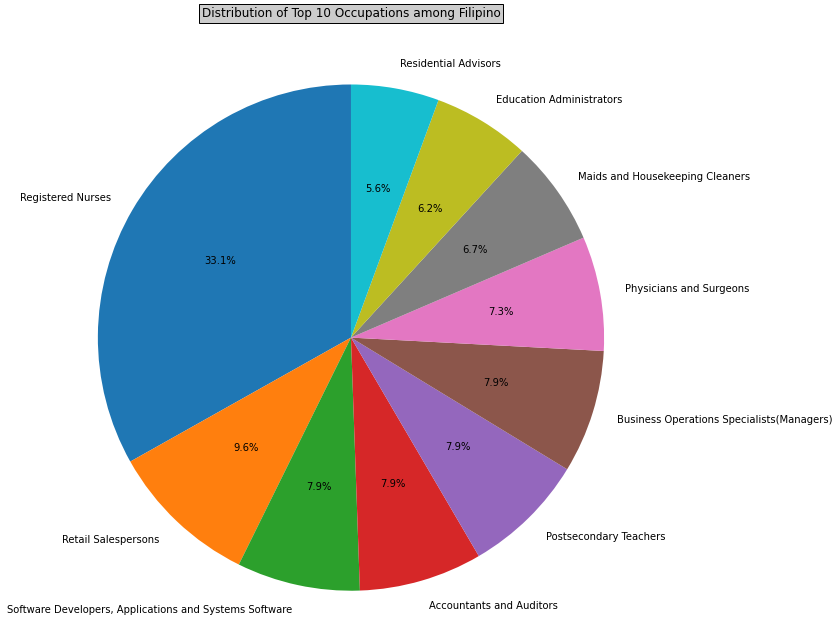

In [9]:
occ=Filipino['OCC2010'].value_counts()
count=occ.tolist()[:10]
occ_list=['Registered Nurses','Retail Salespersons','Software Developers, Applications and Systems Software','Accountants and Auditors',
          'Postsecondary Teachers','Business Operations Specialists(Managers)','Physicians and Surgeons','Maids and Housekeeping Cleaners',
          'Education Administrators','Residential Advisors']
sum_top=sum(count[:10])
print('There are',str(sum_top),'people work as top 10 occupations, about',str(sum_top/len(Filipino)),'of the total Filipino Laborforce')
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(count,labels=occ_list, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')     
figure_title="Distribution of Top 10 Occupations among Filipino"
plt.title(figure_title, y=1.08,bbox={'facecolor':'0.8','pad':3})


There are 1494 people work as top 10 occupations, about 0.44610331442221557 of the total Indian Laborforce


Text(0.5, 1.08, 'Distribution of Top 10 Occupations among Indian')

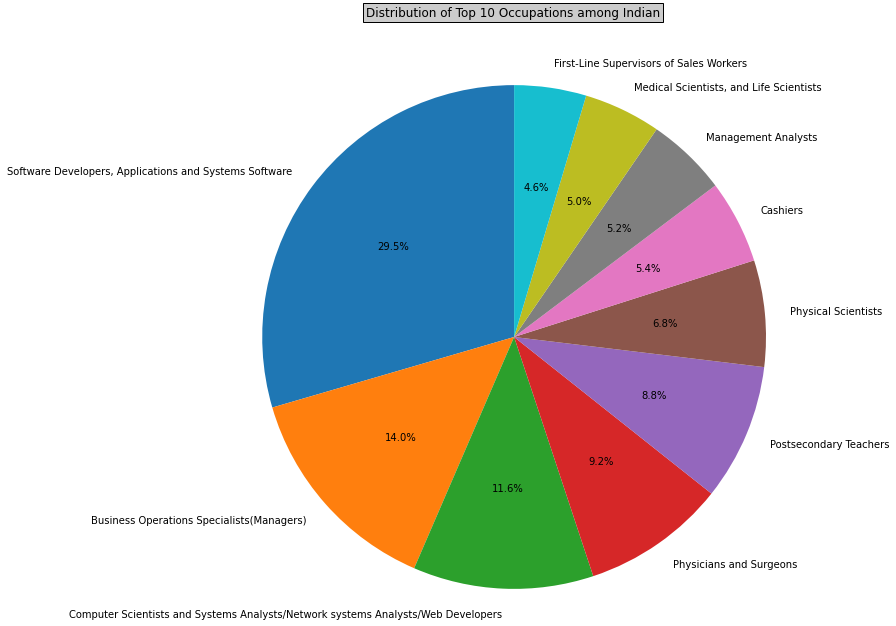

In [10]:
occ=Indian['OCC2010'].value_counts()
count=occ.tolist()[:10]
occ_list=['Software Developers, Applications and Systems Software','Business Operations Specialists(Managers)',
          'Computer Scientists and Systems Analysts/Network systems Analysts/Web Developers','Physicians and Surgeons',
         'Postsecondary Teachers','Physical Scientists','Cashiers','Management Analysts','Medical Scientists, and Life Scientists',
          'First-Line Supervisors of Sales Workers']
sum_top=sum(count[:10])
print('There are',str(sum_top),'people work as top 10 occupations, about',str(sum_top/len(Indian)),'of the total Indian Laborforce')
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(count,labels=occ_list, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')     
figure_title="Distribution of Top 10 Occupations among Indian"
plt.title(figure_title, y=1.08,bbox={'facecolor':'0.8','pad':3})

There are 37 people work as top 10 occupations, about 0.5873015873015873 of the total Indonesian Laborforce


Text(0.5, 1.08, 'Distribution of Top 10 Occupations among Indonesian')

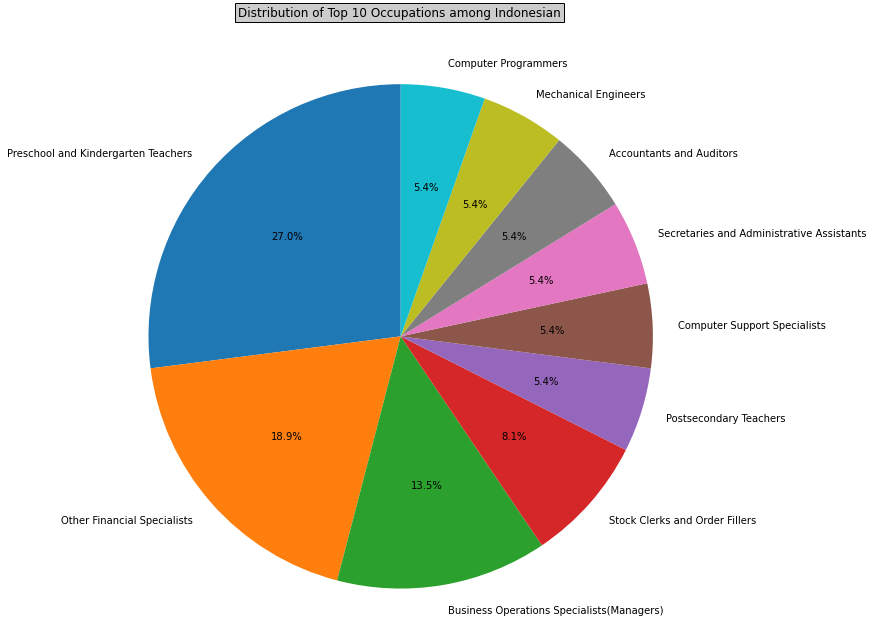

In [11]:
occ=Indonesian['OCC2010'].value_counts()
count=occ.tolist()[:10]
occ_list=['Preschool and Kindergarten Teachers','Other Financial Specialists','Business Operations Specialists(Managers)',
          'Stock Clerks and Order Fillers','Postsecondary Teachers','Computer Support Specialists','Secretaries and Administrative Assistants',
          'Accountants and Auditors','Mechanical Engineers','Computer Programmers']
sum_top=sum(count[:10])
print('There are',str(sum_top),'people work as top 10 occupations, about',str(sum_top/len(Indonesian)),'of the total Indonesian Laborforce')
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(count,labels=occ_list, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')     
figure_title="Distribution of Top 10 Occupations among Indonesian"
plt.title(figure_title, y=1.08,bbox={'facecolor':'0.8','pad':3})

There are 136 people work as top 10 occupations, about 0.3726027397260274 of the total Japanese Laborforce


Text(0.5, 1.08, 'Distribution of Top 10 Occupations among Japanese')

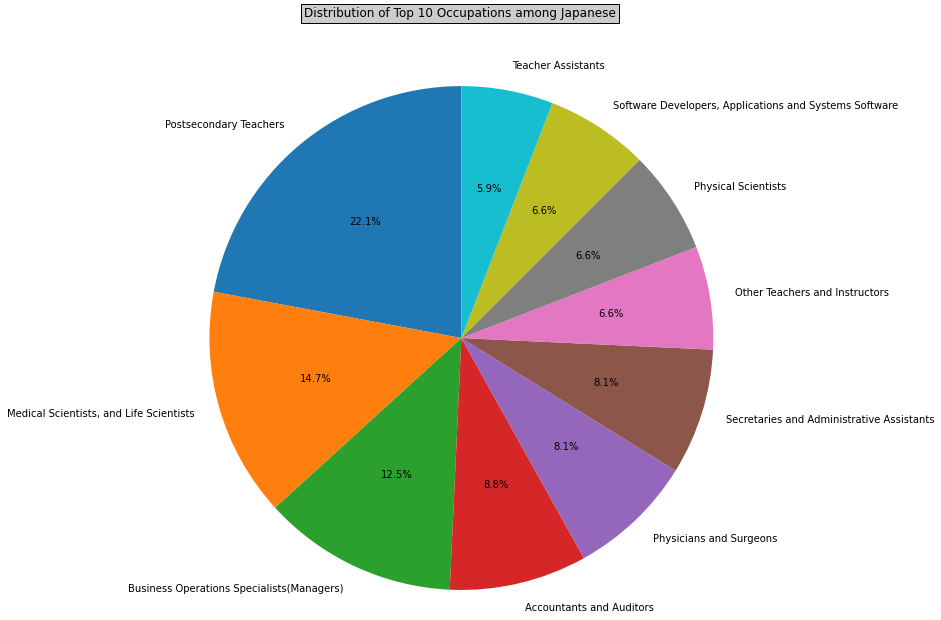

In [12]:
occ=Japanese['OCC2010'].value_counts()
count=occ.tolist()[:10]
occ_list=['Postsecondary Teachers','Medical Scientists, and Life Scientists','Business Operations Specialists(Managers)',
          'Accountants and Auditors','Physicians and Surgeons','Secretaries and Administrative Assistants','Other Teachers and Instructors',
          'Physical Scientists','Software Developers, Applications and Systems Software','Teacher Assistants']
sum_top=sum(count[:10])
print('There are',str(sum_top),'people work as top 10 occupations, about',str(sum_top/len(Japanese)),'of the total Japanese Laborforce')
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(count,labels=occ_list, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')     
figure_title="Distribution of Top 10 Occupations among Japanese"
plt.title(figure_title, y=1.08,bbox={'facecolor':'0.8','pad':3})

There are 273 people work as top 10 occupations, about 0.2941810344827586 of the total Korean Laborforce


Text(0.5, 1.08, 'Distribution of Top 10 Occupations among Korean')

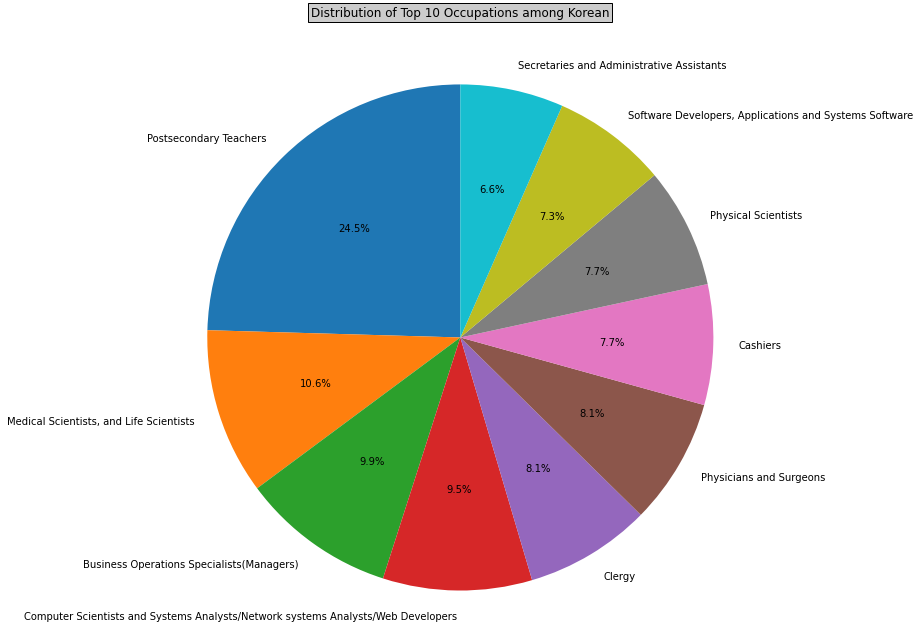

In [13]:
occ=Korean['OCC2010'].value_counts()
count=occ.tolist()[:10]
occ_list=['Postsecondary Teachers','Medical Scientists, and Life Scientists','Business Operations Specialists(Managers)',
          'Computer Scientists and Systems Analysts/Network systems Analysts/Web Developers','Clergy','Physicians and Surgeons',
          'Cashiers','Physical Scientists','Software Developers, Applications and Systems Software','Secretaries and Administrative Assistants']
sum_top=sum(count[:10])
print('There are',str(sum_top),'people work as top 10 occupations, about',str(sum_top/len(Korean)),'of the total Korean Laborforce')
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(count,labels=occ_list, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')     
figure_title="Distribution of Top 10 Occupations among Korean"
plt.title(figure_title, y=1.08,bbox={'facecolor':'0.8','pad':3})

There are 59 people work as top 10 occupations, about 0.4306569343065693 of the total Thai Laborforce


Text(0.5, 1.08, 'Distribution of Top 10 Occupations among Thai')

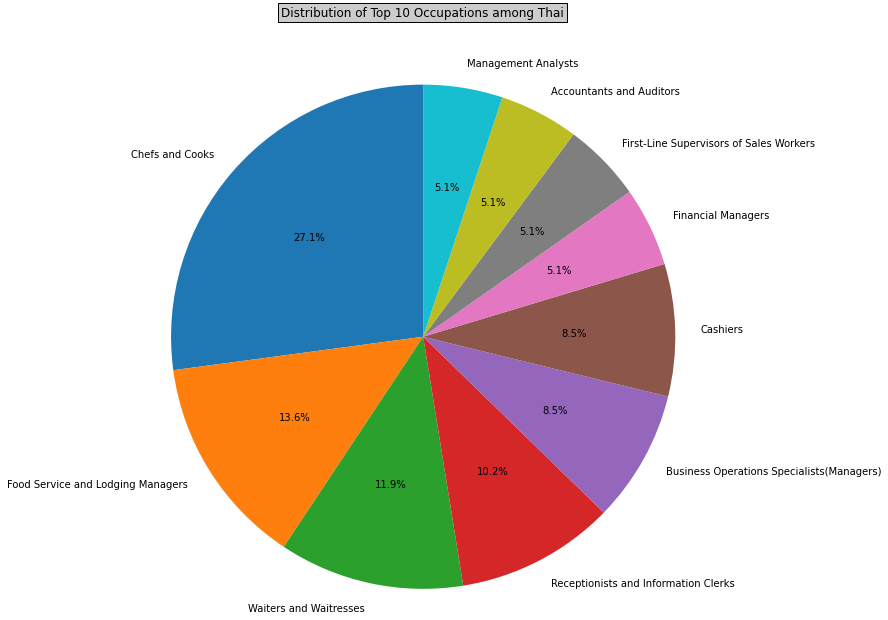

In [14]:
occ=Thai['OCC2010'].value_counts()
count=occ.tolist()[:10]
occ_list=['Chefs and Cooks','Food Service and Lodging Managers','Waiters and Waitresses','Receptionists and Information Clerks',
          'Business Operations Specialists(Managers)','Cashiers','Financial Managers','First-Line Supervisors of Sales Workers',
          'Accountants and Auditors','Management Analysts']
sum_top=sum(count[:10])
print('There are',str(sum_top),'people work as top 10 occupations, about',str(sum_top/len(Thai)),'of the total Thai Laborforce')
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(count,labels=occ_list, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')     
figure_title="Distribution of Top 10 Occupations among Thai"
plt.title(figure_title, y=1.08,bbox={'facecolor':'0.8','pad':3})

There are 444 people work as top 10 occupations, about 0.30833333333333335 of the total Vietnamese Laborforce


Text(0.5, 1.08, 'Distribution of Top 10 Occupations among Vietnamese')

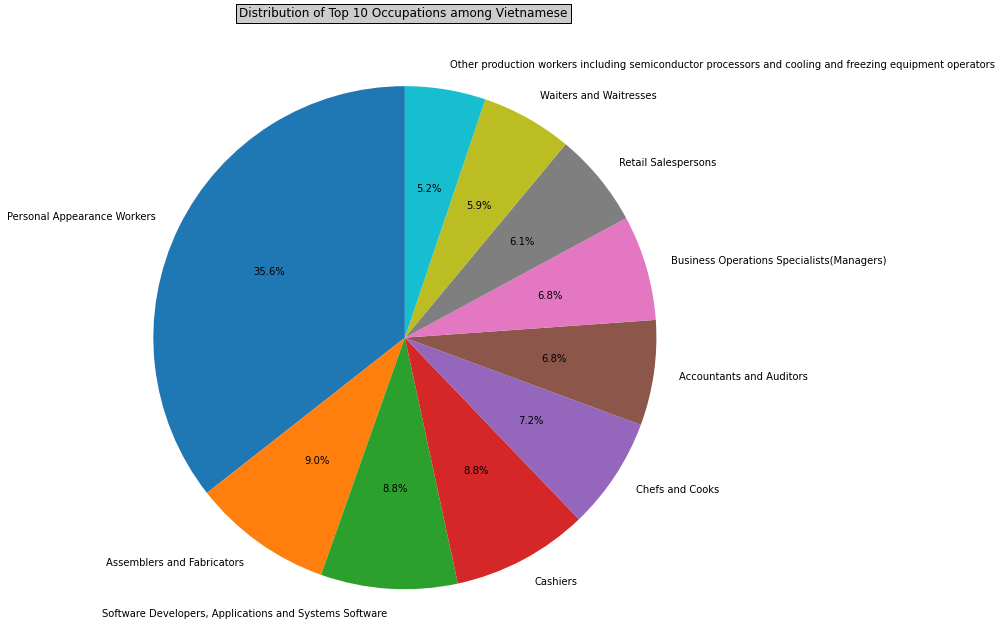

In [15]:
occ=Vietnamese['OCC2010'].value_counts()
count=occ.tolist()[:10]
occ_list=['Personal Appearance Workers','Assemblers and Fabricators','Software Developers, Applications and Systems Software','Cashiers',
          'Chefs and Cooks','Accountants and Auditors','Business Operations Specialists(Managers)','Retail Salespersons',
          'Waiters and Waitresses','Other production workers including semiconductor processors and cooling and freezing equipment operators']
sum_top=sum(count[:10])
print('There are',str(sum_top),'people work as top 10 occupations, about',str(sum_top/len(Vietnamese)),'of the total Vietnamese Laborforce')
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(count,labels=occ_list, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')     
figure_title="Distribution of Top 10 Occupations among Vietnamese"
plt.title(figure_title, y=1.08,bbox={'facecolor':'0.8','pad':3})

In [16]:
import pandas as pd
import numpy as np
data = pd.read_csv("./ipums_usa.csv")
data = data.replace({'CITY': {0:"Unknown", 810:"Boston", 930:"Cambridge", 3770:"Lowell", 6670:"Springfield", 
                              7570:"Worcester"}})
data = data.replace({'STATEFIP': {25:"Massachusetts"}})


data = data.replace({'SEX': {1:"Male", 2:"Female"}})


data = data.replace({'RACE': {4:"Chinese", 5:"Japanese", 6:"Other Asian or Pacific Islander"}})

data = data.replace({'RACED': {400:"Chinese",410:"Chinese", 500:"Japanese", 600:"Filipino", 610:"Indian", 620:"Korean", 
                               640:"Vietnamese",641:"Other",642:"Other",643:"Other",660:"Other",661:"Other",662:"Other",
                               663:"Thai",664:"Other",665:"Other",666:"Indonesian",667:"Other",669:"Other",670:"Other",
                               671:"Other",673:"Other",674:"Other",675:"Other",676:"Other",677:"Other",678:"Other",
                               679:"Other"}})
data=data[data.OCC2010!=9920]

data['OCC2010'] = data['OCC2010'].replace(np.arange(0,440), 'Managers')
data['OCC2010'] = data['OCC2010'].replace(np.arange(450,970), 'Business Operators')
data['OCC2010'] = data['OCC2010'].replace(np.arange(1000,1570), 'IT Professionals')
data['OCC2010'] = data['OCC2010'].replace(np.arange(1580,1990), 'Researchers & Scientists')
data['OCC2010'] = data['OCC2010'].replace(np.arange(2000,2160), 'Social Service Providers & Military')
data['OCC2010'] = data['OCC2010'].replace(np.arange(2170,2560), 'Education Professionals')
data['OCC2010'] = data['OCC2010'].replace(np.arange(2570,2930), 'Art & Media')
data['OCC2010'] = data['OCC2010'].replace(np.arange(2940,3660), 'Healthcare Professionals')
data['OCC2010'] = data['OCC2010'].replace(np.arange(3670,3960), 'Social Service Providers & Military')
data['OCC2010'] = data['OCC2010'].replace(np.arange(3970,4160), 'Food Service Providers')
data['OCC2010'] = data['OCC2010'].replace(np.arange(4170,4660), 'Other Service Providers')
data['OCC2010'] = data['OCC2010'].replace(np.arange(4670,4970), 'Sales')
data['OCC2010'] = data['OCC2010'].replace(np.arange(4980,5960), 'Office and Administrative Support')
data['OCC2010'] = data['OCC2010'].replace(np.arange(6000,6140), 'Agriculture')
data['OCC2010'] = data['OCC2010'].replace(np.arange(6150,6770), 'Consturction')
data['OCC2010'] = data['OCC2010'].replace(np.arange(6790,7650), 'Other Service Providers')
data['OCC2010'] = data['OCC2010'].replace(np.arange(7670,8970), 'Production Workers')
data['OCC2010'] = data['OCC2010'].replace(np.arange(8980,9760), 'Transportation')
data['OCC2010'] = data['OCC2010'].replace(np.arange(9780,9840), 'Social Service Providers & Military')

IT Professionals                       2291
Managers                               1496
Office and Administrative Support      1285
Healthcare Professionals               1237
Education Professionals                1196
Sales                                  1069
Researchers & Scientists                930
Business Operators                      923
Other Service Providers                 922
Food Service Providers                  894
Production Workers                      819
Social Service Providers & Military     369
Art & Media                             334
Transportation                          291
Consturction                            126
Agriculture                              11
Name: OCC2010, dtype: int64


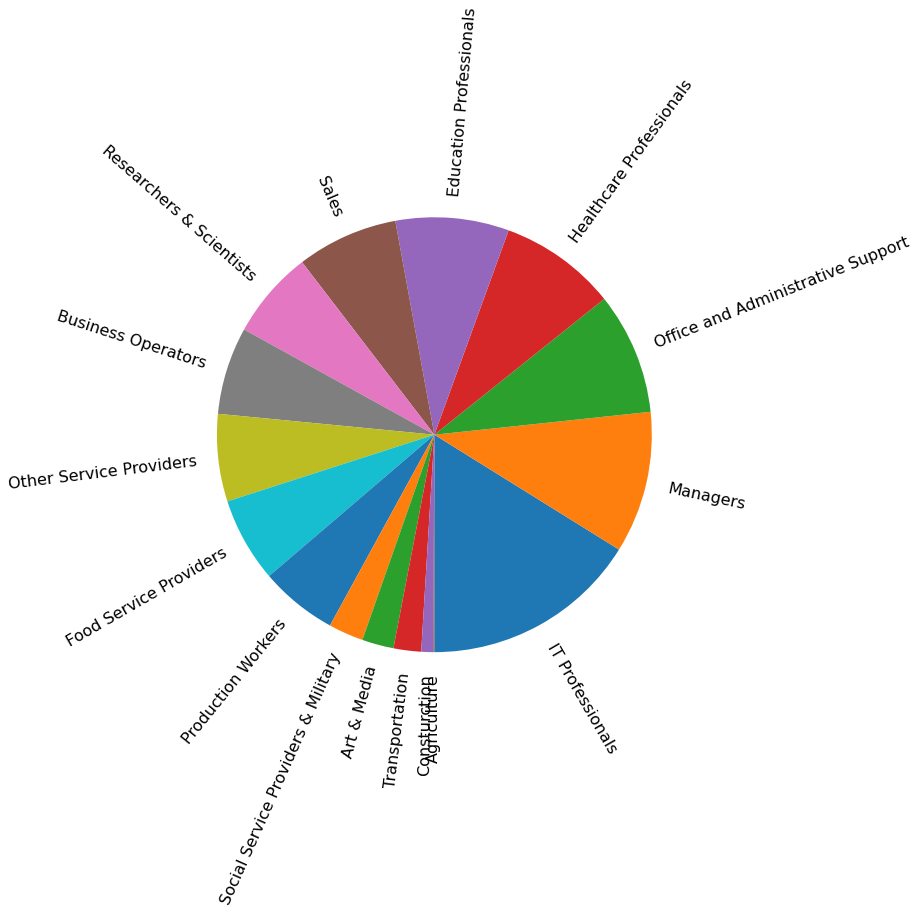

In [17]:
import matplotlib.pyplot as plt
import math
occ=data['OCC2010'].value_counts()
print(occ)
count=occ.tolist()

occ_list=['IT Professionals','Managers','Office and Administrative Support','Healthcare Professionals','Education Professionals','Sales',
          'Researchers & Scientists','Business Operators','Other Service Providers','Food Service Providers','Production Workers',
         'Social Service Providers & Military','Art & Media','Transportation','Consturction','Agriculture']
fig1, ax1 = plt.subplots(figsize=(10,10))




l = ax1.pie(count, startangle=-90)
labels=occ_list
for label, t in zip(labels, l[1]):
    x, y = t.get_position()
    angle = int(math.degrees(math.atan2(y, x)))
    ha = "left"

    if x<0:
        angle -= 180
        ha = "right"

    plt.annotate(label, xy=(x,y), rotation=angle, ha=ha, va="center", rotation_mode="anchor", size=len(labels))
    
    
#ax1.pie(count,labels=occ_list, autopct='%1.1f%%', shadow=False, startangle=90)
#ax1.axis('equal')     
#figure_title="Distribution of Simplified Occupations"
#plt.title(figure_title, y=1.08,bbox={'facecolor':'0.8','pad':3})